# Example if call LibRadTran from the notebook
=======================================================================

- Sylvie Dagoret-Campagne
- update 31 May 2019



Simple test to call on-line libradtran to check if it is working

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [37]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 10  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points

In [38]:
from scipy.interpolate import interp1d

In [39]:
from librtsimana import *
#from libsimulateTranspCTIOScattAbsAer3 import *
from libsimulateTranspPDMScattAbsAer3 import *
#from libsimulateTranspOHPScattAbsAer3 import *

In [40]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1'

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
airmass=1.0
pressure = 712
pwv=1.0
aer=0
ozone=300.
temperature=273.0

## Pressure

In [43]:
variations=np.linspace(-0.5,0.5,11)

In [44]:
variations

array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

In [45]:
all_temperatures=temperature+variations*temperature

In [46]:
NBOBS=len(all_temperatures)

In [47]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [48]:
all_transmission=np.zeros((NBWL,NBOBS))

In [49]:
path,thefile=ProcessSimulation2(airmass,pwv,ozone,pressure,temperature,prof_str='us',proc_str='sa')
data = np.loadtxt(os.path.join(path,thefile))
wl0 = data[:,0]
atm0 = data[:,1]  
func0=interp1d(wl0,atm0,kind='linear') 
transm0=func0(WL)

---------------ProcessSimulation2-----------------------------
 1) airmass =  1.0
 2) pwv =  1.0
 3) oz =  300.0
 4) pressure  =  712
 5) temperature  =  273.0
 6) atmospheric profile =  us
 7) interaction processes =  sa
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.INP
Output to file                :  simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.OUT
uvspec cmd:  /Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.INP > simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.OUT


In [50]:
idx=0
for temp in all_temperatures:
    path,thefile=ProcessSimulation2(airmass,pwv,ozone,pressure,temp,prof_str='us',proc_str='sa')
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1]  
    func=interp1d(wl,atm,kind='linear') 
    transm=func(WL)
    all_transmission[:,idx]=transm
    idx+=1

---------------ProcessSimulation2-----------------------------
 1) airmass =  1.0
 2) pwv =  1.0
 3) oz =  300.0
 4) pressure  =  712
 5) temperature  =  136.5
 6) atmospheric profile =  us
 7) interaction processes =  sa
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.INP
Output to file                :  simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.OUT
uvspec cmd:  /Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.INP > simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z10_wv10_oz30.OUT
---------------ProcessSimulation2-----------------------------
 1) airmass =  1.0
 2) pwv =  1.0
 3) oz =  300.0
 4) pressure  =  712
 5) temperature  =  163.8
 6) atmospheric profile =  us
 7) interaction processes =  sa
--------------------------------------------
R

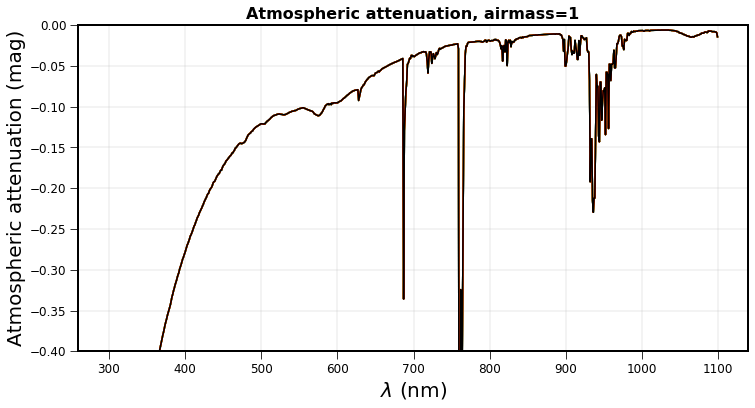

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)   
idx=0
for temp in all_temperatures:
    colorVal = scalarMap.to_rgba(idx, alpha=1)
    ax.plot(WL,2.5*np.log10(all_transmission[:,idx]),color=colorVal)
    idx+=1
ax.plot(WL,2.5*np.log10(transm0),'k')
ax.set_xlabel("$\lambda$ (nm)",fontsize=20)
ax.set_ylabel("Atmospheric attenuation (mag)",fontsize=20)
ax.set_title("Atmospheric attenuation, airmass=1")
ax.set_ylim(-.4,0.)
ax.grid()

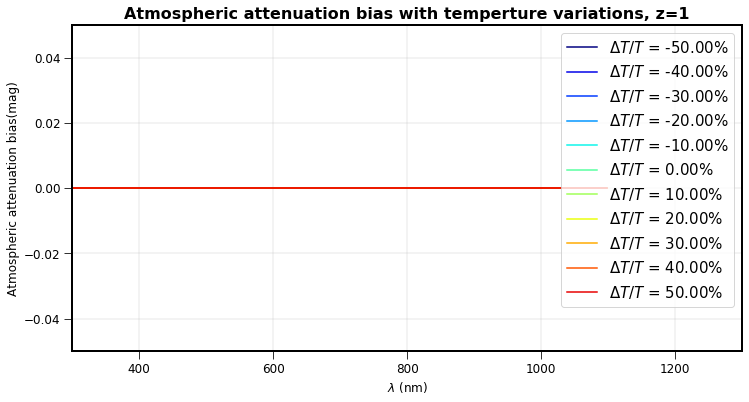

In [54]:
idx=0
for temp in all_temperatures:
    colorVal = scalarMap.to_rgba(idx, alpha=1)
    label="$\Delta T/T$ = {:1.2f}%".format(variations[idx]*100.)
    plt.plot(WL,2.5*np.log10(all_transmission[:,idx]/transm0),color=colorVal,label=label)
    idx+=1
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Atmospheric attenuation bias(mag)")
plt.title("Atmospheric attenuation bias with temperture variations, z=1")
plt.ylim(-0.05,0.05)
plt.xlim(300,1300)
plt.grid()
plt.legend(loc="upper right",fontsize=15)

In [ ]:
assert False

In [ ]:
np.savetxt('transmission.txt',all_transmission)